<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Distributions: Part II
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 12</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### The normal distribution
- Why do people care so much about this distribution?

Sum of N independent, random variables each following same distribution:
$$ S = X_1 + X_2 + ... + X_N $$


Let each $X_i$ be the result of a Bernoulli trial:

<img src = "Images/simple_bernoulli.png" width = 500>

- $S$ would be how many steps right under $N$ trials.
- What kind of distribution?

Binomial!
3 trials.

In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt
N = 3
p = 0.5

pmf_binomial = [(x, binom.pmf(x, n = N, p = p)) 
                for x in range(0,10)]

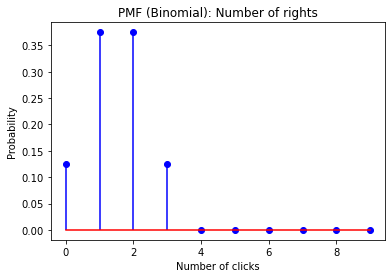

In [2]:
x,y = list(zip(*pmf_binomial))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Number of rights')
plt.show()

Plot it for actual distance deviation:

$$ d = n_R - n_L = n_R - (N-n_r)$$

In [3]:
import numpy as np
N = 3
p = 0.5

pmf_deviation = [(x - (N - x), binom.pmf(x, n = N, p = p)) 
                for x in np.arange(-5,5,1)]

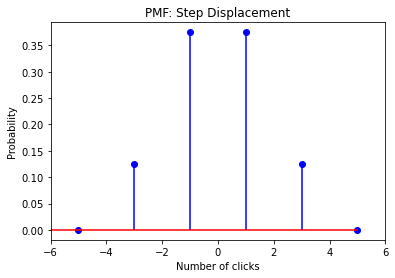

In [4]:
x,y = list(zip(*pmf_deviation))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('PMF: Step Displacement')
plt.xlim(-6,6)
plt.show()

When $N$ gets sufficiently big:

In [5]:
from IPython.display import YouTubeVideo

galton_video = YouTubeVideo('Vo9Esp1yaC8', width = 800, height = 600)

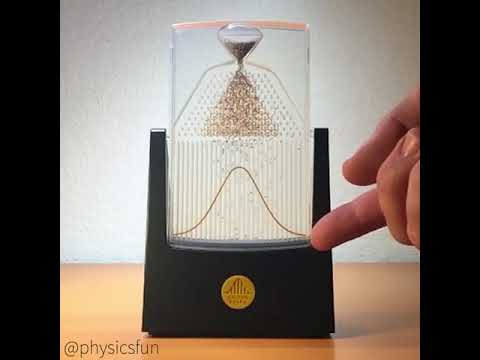

In [6]:
display(galton_video)

- If make slits finer, and $N \rightarrow \infty$ :
- Histogram becomes the continuous normal pdf.

**Most distributions satisfying weak requirements**:
- Finite variance.
- Defined mean.

Bernoulli was an underlying distribution that satisfied this.

Sum of random variables drawn from these distribution follows normal distribution as N goes large.

#### Known as: The central limit theorem

Take N = 200 samples of waiting times of drivers at a toll:

- Follows exponential distribution with average wait time $\tau$
- Has finite variance $\tau^2$.

In [19]:
from scipy.stats import expon

#assume population mean 3 minutes
pop_mean = 3

wait_time_sample = expon.rvs(loc = pop_mean/2, scale = pop_mean/2, size = 50)

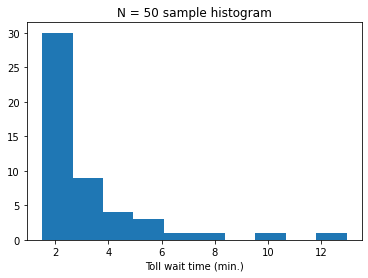

In [20]:
plt.hist(wait_time_sample)
plt.xlabel('Count')
plt.xlabel('Toll wait time (min.)')
plt.title('N = 50 sample histogram')
plt.show()


Obviously, not normal distributed.

- Want statistics/uncertainty of the **sample mean** as we repeat for many trials of samples with N = 50.

$$ \bar{T} = \frac{1}{N}\sum_{i=1}^{N}T_i $$

- Here N = 50
- Apart from factor of (1/N), this is a sum of random variables!

##### Create a list of 500 trials of these N = 50 samples from exponential distribution.

In [21]:
pop_mean = 3
many_sample_trials = [expon.rvs(loc = pop_mean/2, scale = pop_mean/2, size = 50) for trial in range(10000)]
many_sample_trials[0:2]

[array([2.53906666, 3.21990922, 1.57153355, 1.99233102, 1.77091973,
        1.80182443, 2.15542139, 1.95654784, 3.60871032, 3.36364673,
        4.79766903, 2.69437366, 3.86407932, 1.56150358, 2.87047545,
        3.82289688, 2.93322265, 3.62164865, 2.20197715, 1.53811462,
        3.77581448, 5.30761895, 4.91432236, 3.00027147, 1.52075181,
        3.43661388, 1.66416581, 1.86760995, 5.0195149 , 8.27366983,
        2.28623199, 1.97650806, 5.69605069, 2.17999936, 3.14884628,
        2.29693744, 1.8626246 , 1.90429585, 3.39287948, 3.2074407 ,
        2.13375352, 2.87453326, 1.50612247, 4.06845582, 1.59183005,
        1.70230813, 2.20538978, 2.88485203, 5.1295713 , 2.95465585]),
 array([ 1.78356422,  2.52031789,  2.99208687,  2.341879  ,  2.49579179,
         4.55779502,  2.70969414,  2.12533226,  1.94029544,  1.55125747,
         2.66945662,  2.97312215,  5.43636021, 10.85260966,  1.81952389,
         2.13810456,  5.27511944,  4.49659417,  2.39566195,  2.16169478,
         1.97607478,  3.48

Return list of sample means:

In [22]:
sample_mean_list = [sample.mean() for sample in many_sample_trials]
len(sample_mean_list)

10000

What does the distribution of means look like?

$$ \bar{T} = \frac{1}{N}\sum_{i=1}^{N}T_i $$

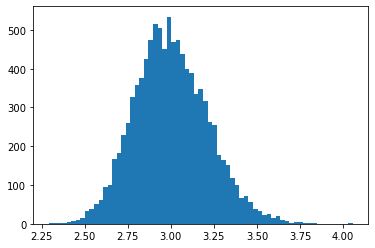

In [23]:
plt.hist(sample_mean_list, bins = "auto")
plt.show()

**The distribution of mean of a sample follow normal distribution**

- Regardless of underlying population distribution.

This is a very large reason why normal distribution is so important!

#### Standard Normal Distribution

- Often useful to rescale normal by mean/std.
- New rescaled normal has mean of 0 and variance of 1.
- Z-distribution.

We simply subtract the mean $\mu$ from each value and then divide by the standard deviation $\sigma$:

$$z = \frac{x - \mu}{\sigma}$$

We call this process **standardization**.

Mathematical form for pdf:
$$ N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

- $\mu$ is mean.
- $\sigma$ is standard deviation.

Scaled transformation:
$$ \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}} $$

<center><img src = "Images/rescale_normal.png" width = 500></center>

#### $z$-Score

A **$z$-score** for a data point $x$ (in a normal distribution) is simply the distance to the mean in units of standard deviations

$$\large z = \frac{x - \mu}{\sigma}$$

By calculating the z-score of an individual point, we can see how unlikely a value is.

#### The Empirical Rule

- $68\%$ of the values of a normal distribution: lie within 1 standard deviation ($\sigma$) of the mean.
- $95\%$ within $2\sigma$.
- $99.7\%$ within $3\sigma$.  

In [40]:
from scipy.stats import norm
z_score = (11.2-5)/2

In [41]:
norm.cdf(z_score)- norm.cdf(-z_score)

0.9980647935735634

In [51]:
z_score_std_1 = (11.2-5)/1
z_score_std_3 = (11.2-5)/3
z_score_std_5 = (11.2-5)/5

print(norm.cdf(z_score_std_1)- norm.cdf(z_score_std_1))
print(norm.cdf(z_score_std_3)- norm.cdf(z_score_std_3))
print(norm.cdf(z_score_std_5)- norm.cdf(z_score_std_5))

0.0
0.0
0.0


In [63]:
for i in range(1,6,2):
    z_score = (11.2 - 5)/i
    print(f" Percentage of values of std deviation {i} is")
    print(f" Percentage of values of std deviation {z_score}")
    print(norm.cdf(z_score)-norm.cdf(-z_score))

 Percentage of values of std deviation 1 is
 Percentage of values of std deviation 6.199999999999999
0.9999999994353683
 Percentage of values of std deviation 3 is
 Percentage of values of std deviation 2.0666666666666664
0.9612344258223628
 Percentage of values of std deviation 5 is
 Percentage of values of std deviation 1.2399999999999998
0.7850246058508261
